# <u>Analysis of Bollywood Dataset</u>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import seaborn as sns

bollywood = pd.read_csv("bollywood.csv")
bollywood.head(5)
bollywood["Genre"] = bollywood["Genre"].str.strip()

<h2> Meta Data-</h2>
<p>The data file bollywood.csv contains box office collectionandsocial media promotion information about movies released in 2013−2015 period. Following are the columns and their descriptions.:</p>
<ol>
    <li>SlNo</li>
    <li>Release Date</li>
    <li>MovieName–Name of the movie</li>
    <li>ReleaseTime–Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal)</li>
    <li>Genre –Genre of the film such as Romance, Thriller, Action, Comedy,etc</li>
    <li>Budget –Movie creation budget</li>
    <li>BoxOfficeCollection–Box office collection</li>
    <li>YoutubeViews–Number of views of the YouTube trailers</li>
    <li>YoutubeLikes–Number of likes of the YouTube trailers</li>
    <li>YoutubeDislikes–Number of dislikes of the YouTube trailers</li>
</ol>
    

<h3><i> 1. How many records are present in the dataset</i></h3>

In [3]:
bollywood.shape[0]

149

<h3><i> 2. How many movies got released in each genre? Sort number of releases in each genre in descending order.</i></h3>

In [4]:
bollywood.Genre.value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

<h3><i>3. Which genre had highest number of releases?</i></h3>

In [123]:
count=bollywood.Genre.value_counts()
count.index[0]

'Comedy'

<h3><i>4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre andReleaseTime.)</i></h3>

In [6]:
pd.crosstab(bollywood.Genre,bollywood.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


<h3><i>5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)</i></h3>

In [7]:
bollywood["Month"] = pd.DatetimeIndex(bollywood["Release Date"]).month
bollywood

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7
...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,3


In [8]:
bollywood.sort_values(by="Month",inplace=True)
bollywood.Month.value_counts()

1     20
3     19
5     18
2     16
7     16
4     11
6     10
9     10
11    10
10     9
8      8
12     2
Name: Month, dtype: int64

In [ ]:
# Hence in the month of January maximum number of movies are released

<h3><i>6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?</i></h3>

In [9]:
highBudget = bollywood[bollywood.Budget>=25]
highBudget.Month.value_counts()

2     9
1     8
3     7
8     7
7     6
11    6
6     5
9     5
4     4
10    4
5     3
12    2
Name: Month, dtype: int64

In [ ]:
# In February, the release of high budgeted movies is maximum

<h3><i>7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection–Budget) / Budget.</i></h3>

In [10]:
bollywood["ROI"] = (bollywood.BoxOfficeCollection - bollywood.Budget)/bollywood.Budget
maxROI = bollywood[bollywood.ROI==bollywood.ROI.max()]
maxROI.MovieName

64    Aashiqui 2
Name: MovieName, dtype: object

<h3><i>8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.</i></h3>

In [11]:
releaseROI = bollywood[["Genre","ROI"]]
releaseROI.groupby("Genre").agg('mean')

,ROI
Genre,
Action,0.301919
Comedy,0.788394
Drama,1.357455
Romance,1.003218
Thriller,0.195656


<h3><i>9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?</i></h3>

In [12]:
correlation = bollywood.BoxOfficeCollection.corr(bollywood.YoutubeLikes)
correlation

0.6825165877731297

In [13]:
# Since the correlation value is greater 0.6, we can conclude that there exists a moderate positive correlation between
#Box Office Collection and YouTube Likes

<h3><i>10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.</i></h3>

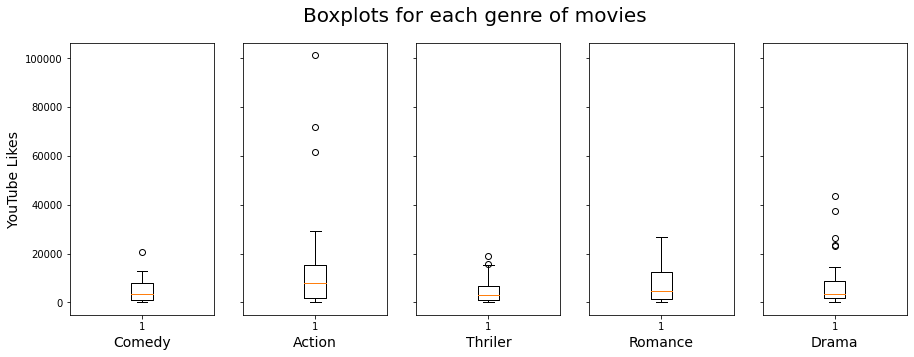

In [14]:
GenreLikes = bollywood[["Genre","YoutubeLikes"]]
GenreLikes.groupby("Genre").agg(sum)

fig, ax = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(15,5))
plt.suptitle("Boxplots for each genre of movies",fontsize=20)
ax[0].set_ylabel("YouTube Likes",fontsize=14)
ax[0].boxplot(bollywood[bollywood.Genre == "Comedy"].YoutubeLikes)
ax[0].set_xlabel("Comedy",fontsize=14)

ax[1].boxplot(bollywood[bollywood.Genre == "Action"].YoutubeLikes)
ax[1].set_xlabel("Action",fontsize=14)

ax[2].boxplot(bollywood[bollywood.Genre == "Thriller"].YoutubeLikes)
ax[2].set_xlabel("Thriler",fontsize=14)

ax[3].boxplot(bollywood[bollywood.Genre == "Romance"].YoutubeLikes)
ax[3].set_xlabel("Romance",fontsize=14)

ax[4].boxplot(bollywood[bollywood.Genre == "Drama"].YoutubeLikes)
ax[4].set_xlabel("Drama",fontsize=14)
plt.show()

<h3><i>11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.<i></h3>

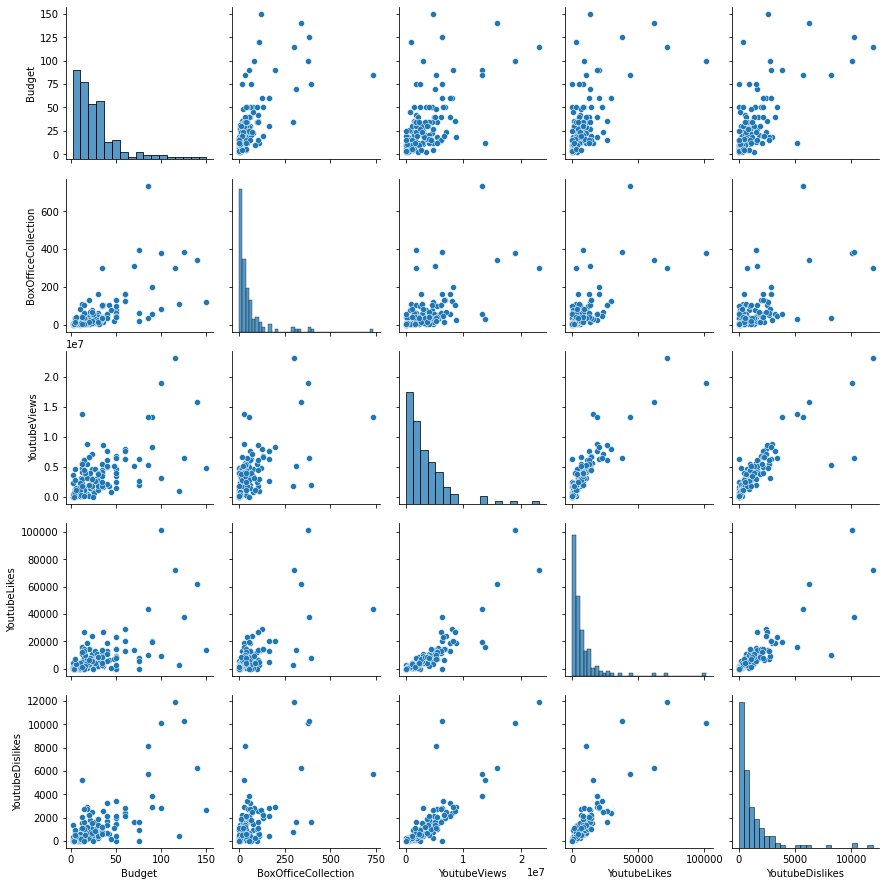

In [15]:
corrMatrix = bollywood[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]]
sns.pairplot(corrMatrix)

<h3><i>12. During 2013−2015 period, highlight the genre of movies and theirbox office collection? Visualize with best fit graph.</i></h3>

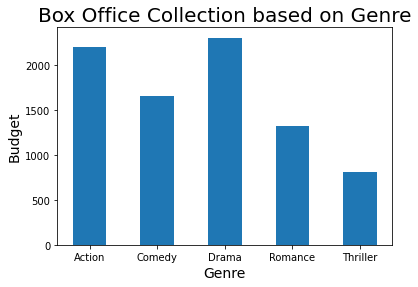

In [85]:
bollywood_boc = bollywood[["Genre","BoxOfficeCollection"]]
bollywood_boc = bollywood_boc.groupby(by="Genre").agg(sum)

plt.bar(bollywood_boc.index,bollywood_boc.BoxOfficeCollection,0.5)
plt.title("Box Office Collection based on Genre",fontsize=20)
plt.ylabel("Budget",fontsize=14)
plt.xlabel("Genre",fontsize=14)
plt.show()

<h3><i>13. Visualize the Budget and Box office collection based on Genre.</i></h3>

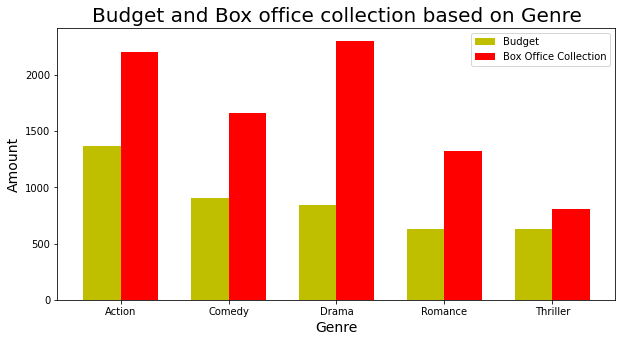

In [71]:
bollywood_budget = bollywood[["Genre","Budget","BoxOfficeCollection"]]
bollywood_budget=bollywood.groupby(by="Genre").agg(sum)

index = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(index,bollywood_budget["Budget"],width,color='y',label="Budget")
ax.bar(index+width,bollywood_budget["BoxOfficeCollection"],width,color='r',label="Box Office Collection")
ax.set_title("Budget and Box office collection based on Genre",fontsize=20)
ax.set_ylabel("Amount",fontsize=14)
ax.set_xlabel("Genre",fontsize=14)
ax.set_xticks(index + width/2)
ax.set_xticklabels(("Action","Comedy","Drama","Romance","Thriller"))
ax.legend()

plt.show()

<h3><i>14. Find the distribution of movie budget for every Genre.</i></h3>

In [126]:
bollywood_dist = bollywood[["Genre","Budget"]]
bollywood_dist = bollywood_dist.groupby(by="Genre").agg(sum)
bollywood_dist.reset_index(inplace=True)

bollywood_dist[["Genre","Budget"]].value_counts()

Genre     Budget
Action    1367      1
Comedy    910       1
Drama     847       1
Romance   629       1
Thriller  634       1
dtype: int64

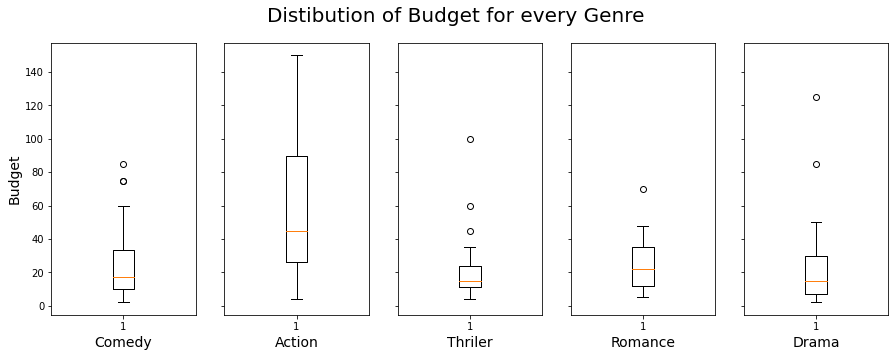

In [138]:
fig, ax = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(15,5))
plt.suptitle("Distibution of Budget for every Genre",fontsize=20)

ax[0].set_ylabel("Budget",fontsize=14)
ax[0].boxplot(bollywood[bollywood.Genre == "Comedy"].Budget)
ax[0].set_xlabel("Comedy",fontsize=14)

ax[1].boxplot(bollywood[bollywood.Genre == "Action"].Budget)
ax[1].set_xlabel("Action",fontsize=14)

ax[2].boxplot(bollywood[bollywood.Genre == "Thriller"].Budget)
ax[2].set_xlabel("Thriler",fontsize=14)

ax[3].boxplot(bollywood[bollywood.Genre == "Romance"].Budget)
ax[3].set_xlabel("Romance",fontsize=14)

ax[4].boxplot(bollywood[bollywood.Genre == "Drama"].Budget)
ax[4].set_xlabel("Drama",fontsize=14)
plt.show()

<h3><i>15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.</i></h3>

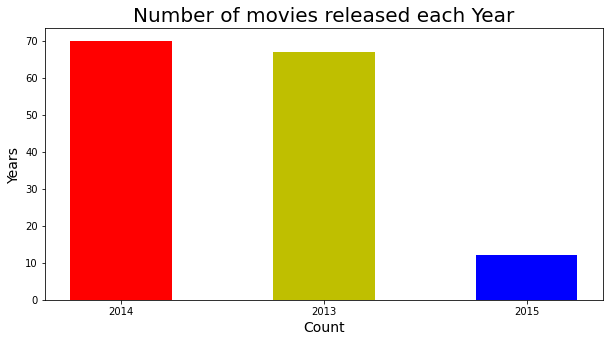

In [116]:
colors=['r','y','b']
count = pd.DatetimeIndex(bollywood["Release Date"]).year.value_counts()
plt.bar(count.index.astype(str),count.values,width=0.5,color=colors)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Number of movies released each Year",fontsize=20)
plt.ylabel("Years",fontsize=14)
plt.xlabel("Count",fontsize=14)
plt.show()